<a href="https://colab.research.google.com/github/light-ti-man/Drop_of_my_Python_Projects/blob/master/Unsupervised_Learning_Models/analysis_of_omdena_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from time import time
import pandas as pd
import numpy as np
import re
import sys
import csv
csv.field_size_limit(sys.maxsize)

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import itertools
import datetime

import pprint
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
df = pd.read_csv('/content/Survey_D.csv',lineterminator='\n')
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')

df.head()

There are 40 rows and 6 columns in the training set


,S/N,NAME,Omdena challenge,Used Tech Tools provided by Omde,Suggested Tech Tools,Comments on Difficulties\r
0,2,Leo Sanchez,"Spacept, WRI, Sintecsys,","Labelbox, Slack, Github, AWS","Tableau, AWS (with more freedom), Zoom (for ta...","Excess of communication in Slack, team not pus..."
1,3,Aboli Marathe,"Energy transitions, Youth Sentiment",NaN,"A good lot of API keys for social media, remot...",Facebook and Twitter APIs often put constraint...
2,4,Emma Roscow,TrashOut,NaN,NaN,Hosting the model on an easy-to-use platform t...
3,5,Sara,"PTSD, TrashOut",NaN,"Azure or AWS or GCP, Labelbox, Zoom",
4,6,Amardeep Singh,"World Resources Institute Project, ASU Shaping...",Some of the tools like access to online reposi...,"AWS Sagemaker, IBM Watson or Bluemix, Google G...",Having access to cloud credits to speed up the...


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   S/N                               40 non-null     int64 
 1   NAME                              40 non-null     object
 2   Omdena challenge                  40 non-null     object
 3   Used Tech Tools provided by Omde  25 non-null     object
 4   Suggested Tech Tools              33 non-null     object
         40 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [142]:
df.isnull().sum()

S/N                                  0
NAME                                 0
Omdena challenge                     0
Used Tech Tools provided by Omde    15
Suggested Tech Tools                 7
Comments on Difficulties\r           0
dtype: int64

In [143]:
df1 = df.drop(['NAME'], axis=1)

In [144]:
df1.columns

Index(['S/N', 'Omdena challenge', 'Used Tech Tools provided by Omde',
       'Suggested Tech Tools', 'Comments on Difficulties\r'],
      dtype='object')

In [145]:
!pip install contractions
import contractions

In [146]:
df1.head(5)

,S/N,Omdena challenge,Used Tech Tools provided by Omde,Suggested Tech Tools,Comments on Difficulties\r
0,2,"Spacept, WRI, Sintecsys,","Labelbox, Slack, Github, AWS","Tableau, AWS (with more freedom), Zoom (for ta...","Excess of communication in Slack, team not pus..."
1,3,"Energy transitions, Youth Sentiment",NaN,"A good lot of API keys for social media, remot...",Facebook and Twitter APIs often put constraint...
2,4,TrashOut,NaN,NaN,Hosting the model on an easy-to-use platform t...
3,5,"PTSD, TrashOut",NaN,"Azure or AWS or GCP, Labelbox, Zoom",
4,6,"World Resources Institute Project, ASU Shaping...",Some of the tools like access to online reposi...,"AWS Sagemaker, IBM Watson or Bluemix, Google G...",Having access to cloud credits to speed up the...


**Explore the first column(Omdena Challenge)**

In [147]:
# Noise Cleaning - spacing, special characters, lowercasing 
import regex as re

df1['Omdena challenge'] = df1['Omdena challenge'].str.lower()
df1['Omdena challenge'] = df1['Omdena challenge'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

In [148]:
df1.head(5)

,S/N,Omdena challenge,Used Tech Tools provided by Omde,Suggested Tech Tools,Comments on Difficulties\r
0,2,spacept wri sintecsys,"Labelbox, Slack, Github, AWS","Tableau, AWS (with more freedom), Zoom (for ta...","Excess of communication in Slack, team not pus..."
1,3,energy transitions youth sentiment,NaN,"A good lot of API keys for social media, remot...",Facebook and Twitter APIs often put constraint...
2,4,trashout,NaN,NaN,Hosting the model on an easy-to-use platform t...
3,5,ptsd trashout,NaN,"Azure or AWS or GCP, Labelbox, Zoom",
4,6,world resources institute project asu shaping ...,Some of the tools like access to online reposi...,"AWS Sagemaker, IBM Watson or Bluemix, Google G...",Having access to cloud credits to speed up the...


In [149]:
#nltk tokenization
df1['Omdena challenge tokenize'] = df1['Omdena challenge'].apply(word_tokenize)

In [150]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
# Before removing checking occurances of stopwords in article content

%matplotlib inline
from matplotlib import pyplot as plt

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

In [152]:
df1.columns

Index(['S/N', 'Omdena challenge', 'Used Tech Tools provided by Omde',
       'Suggested Tech Tools', 'Comments on Difficulties\r',
       'Omdena challenge tokenize'],
      dtype='object')

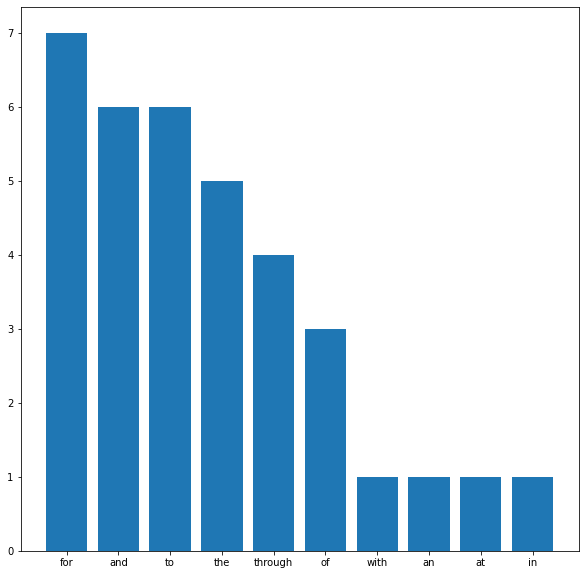

In [153]:
df2 = df1['Omdena challenge']
plot_top_stopwords_barchart(df2)

In [154]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

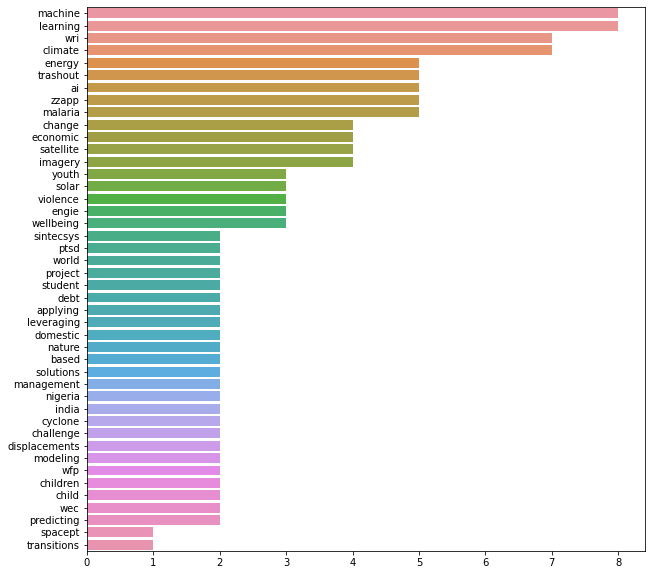

In [155]:
plot_top_non_stopwords_barchart(df2)

In [156]:
df1.columns

Index(['S/N', 'Omdena challenge', 'Used Tech Tools provided by Omde',
       'Suggested Tech Tools', 'Comments on Difficulties\r',
       'Omdena challenge tokenize'],
      dtype='object')

**Analysis of the last column(Comments on Difficulties)**

In [157]:
# Noise Cleaning - spacing, special characters, lowercasing 
import regex as re

df1['Comments on Difficulties\r'] = df1['Comments on Difficulties\r'].str.lower()
df1['Comments on Difficulties\r'] = df1['Comments on Difficulties\r'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

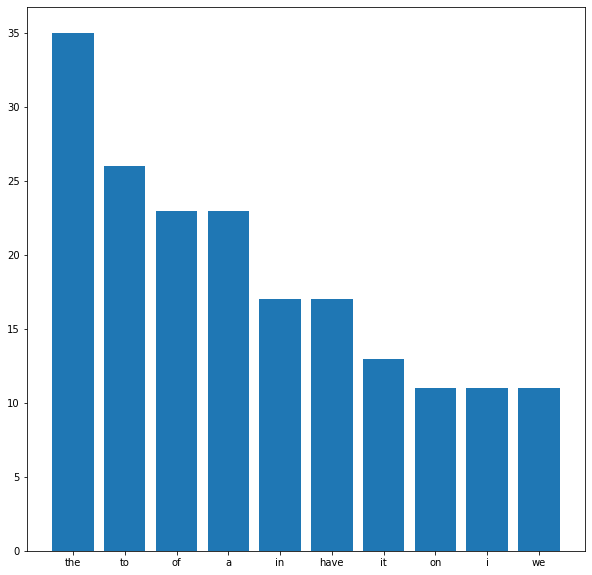

In [158]:
df4 = df1['Comments on Difficulties\r']
plot_top_stopwords_barchart(df4)

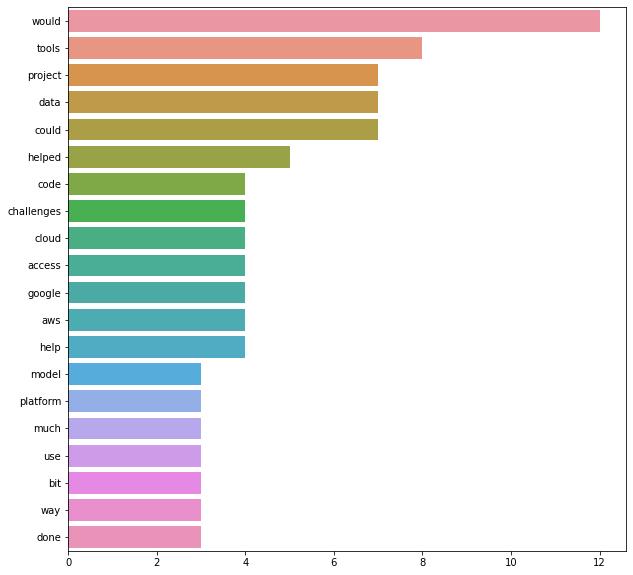

In [159]:
plot_top_non_stopwords_barchart(df4)

In [160]:
df1.head(5)

,S/N,Omdena challenge,Used Tech Tools provided by Omde,Suggested Tech Tools,Comments on Difficulties\r,Omdena challenge tokenize
0,2,spacept wri sintecsys,"Labelbox, Slack, Github, AWS","Tableau, AWS (with more freedom), Zoom (for ta...",excess of communication in slack team not push...,"[spacept, wri, sintecsys]"
1,3,energy transitions youth sentiment,NaN,"A good lot of API keys for social media, remot...",facebook and twitter apis often put constraint...,"[energy, transitions, youth, sentiment]"
2,4,trashout,NaN,NaN,hosting the model on an easytouse platform to ...,[trashout]
3,5,ptsd trashout,NaN,"Azure or AWS or GCP, Labelbox, Zoom",,"[ptsd, trashout]"
4,6,world resources institute project asu shaping ...,Some of the tools like access to online reposi...,"AWS Sagemaker, IBM Watson or Bluemix, Google G...",having access to cloud credits to speed up the...,"[world, resources, institute, project, asu, sh..."


**Exploration of Perspectives on Tools**

In [181]:
dff1 = pd.read_csv('/content/Survey_D1.csv',lineterminator='\n')
dff1 = dff1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')

dff1.head()

There are 40 rows and 6 columns in the training set


,S/N,Used Tech Tools,Suggested Tech Tools\r
0,2,"Labelbox, Slack, Github, AWS","Tableau, AWS, Zoom, Datasets tools"
1,3,NaN,"CoCalc environments, Pycharm plugin, VSCode"
2,4,NaN,
3,5,NaN,"Azure or AWS or GCP, Labelbox, Zoom"
4,6,Some of the tools like access to online reposi...,"AWS Sagemaker, IBM Watson or Bluemix, Google G..."


In [182]:
# Noise Cleaning - spacing, special characters, lowercasing 

dff1['Suggested Tech Tools\r'] = dff1['Suggested Tech Tools\r'].str.lower()
dff1['Suggested Tech Tools\r'] = dff1['Suggested Tech Tools\r'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

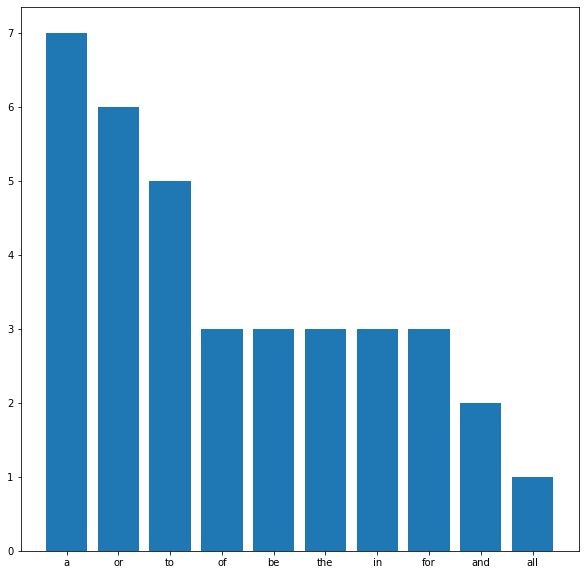

In [183]:
df5 = dff1['Suggested Tech Tools\r']
plot_top_stopwords_barchart(df4)

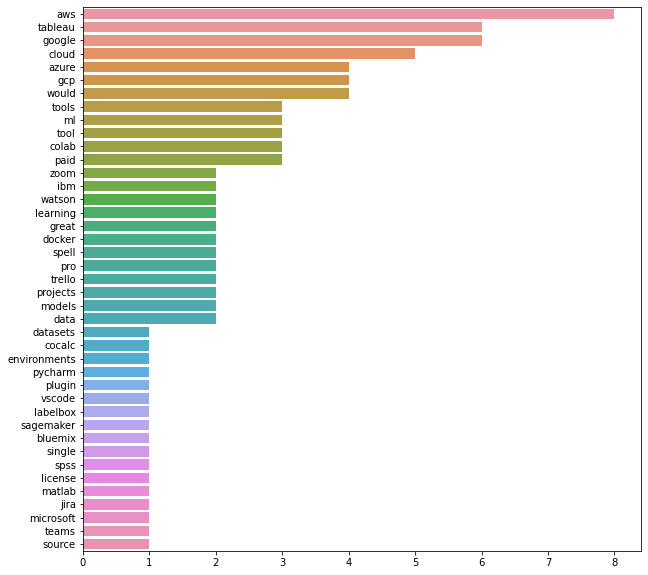

In [184]:
plot_top_non_stopwords_barchart(df5)

In [187]:
# Noise Cleaning - spacing, special characters, lowercasing 

dff1['Used Tech Tools'] = dff1['Used Tech Tools'].str.lower()

In [189]:
dff1['Used Tech Tools'] = dff1['Used Tech Tools'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

TypeError: ignored

In [ ]:
# Now we remove stopwords 

train['total_tokenize'] = train['total_tokenize'].apply(lambda x: [word for word in x if word not in stop_words])
train['total_tokenize_join'] = [' '.join(map(str, l)) for l in train['total_tokenize']]